# Credit Card Fraud Detection

We will perform CNN on Credit Card Dataset to check whether the transactions are fraud or not

In [407]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [408]:
#!pip install tensorflow
#!pip install keras

In [409]:
import tensorflow as tf
import keras

In [410]:
# import the dataset          //Link - ####
data=pd.read_csv('./creditcard.csv.zip')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [411]:
#check the shape of our dataset
data.shape

(284807, 31)

Here there are 31 columns and the last column is the target variable named Class

In [412]:
#we will check if there are any null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there is no null value in the dataset

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [414]:
#checking that how many values are present in the 'class' having values as 0 or 1
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here there are legitimate 284315 transactions and the transactions which are fraud are only 492.
So we can say that data is highly imbalanced, we have to balance the dataset

In [415]:
#dividing the dataframe into fraud and non fraud data
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]

In [416]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

We are going to make the non_fraud data frame of the same size of the fraud.shape to match the entries

Balancing the dataset

In [417]:
# Now we are randomly going to select the 492 non-fraud entries from the dataframe 
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

Now that we have data that is balanced, we will merge the dataset of non_fraud and fraud transactions

In [418]:
dataset=fraud.append(non_fraud, ignore_index=True)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,126514.0,2.009878,-0.419837,-1.048880,0.161955,-0.286948,-0.533236,-0.309107,0.026197,0.799434,...,-0.011930,0.001342,0.180537,-0.403852,-0.269642,0.567479,-0.081854,-0.077994,10.00,0
980,120604.0,2.127571,-1.038377,-0.554633,-0.942419,-1.028566,-0.359125,-1.073927,-0.000746,-0.113952,...,0.359123,1.080480,0.076285,-0.295380,-0.138017,-0.088578,0.005407,-0.059745,19.95,0
981,127824.0,0.488722,1.039265,-0.488136,1.270368,0.415800,-0.940575,0.936812,-0.410632,-0.569363,...,0.421984,1.472289,-0.005639,0.040475,-1.124174,0.128788,0.345545,0.316235,47.18,0
982,153385.0,2.055887,-0.793772,-0.322353,-0.216264,-1.112202,-0.664867,-0.757331,-0.126868,0.110988,...,-0.567928,-1.045090,0.461750,-0.098720,-0.559900,-0.661451,0.058138,-0.023431,25.97,0


In [419]:
# Now we can say that the data is balanced now and concated
dataset.Class.value_counts()


1    492
0    492
Name: Class, dtype: int64

In [420]:
# now dividing the dataframe into dependent and independent varaible
X=dataset.drop(['Class'], axis=1)
Y=dataset['Class']

In [421]:
# we will divide the dataset into training and testing dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# check the shape
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [422]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
962,54459.0,-2.884332,0.241184,1.818326,0.315422,-1.202576,2.674072,-0.089243,0.822562,1.506324,...,-0.565387,0.008613,0.851010,-0.775485,-1.220964,0.557297,-0.271863,-1.566743,-0.994205,175.00
762,41442.0,-0.712745,1.019970,1.924390,-0.080574,0.714555,-0.378487,1.240600,-0.251639,-0.645091,...,-0.029557,0.067341,0.352713,-0.408705,0.090399,0.615330,-0.408993,-0.116134,-0.162332,13.00
334,101051.0,-1.465316,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,...,-1.457610,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.92
889,3746.0,-1.843718,-1.547485,0.677809,-2.957196,3.748813,2.123703,-1.314584,0.954961,-0.072010,...,0.483555,-0.114014,-1.012870,0.118881,0.885744,0.587884,-0.747109,-0.090824,0.074353,15.96
529,149987.0,-1.284072,1.359745,-0.841675,-0.732379,-0.181001,-0.790682,0.156909,0.865815,-0.102711,...,-0.065835,-0.231516,-0.658556,0.177418,-0.368716,-0.347859,0.159441,0.252432,-0.000862,17.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,-0.108006,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00
270,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33
860,74867.0,1.539459,-0.879218,-0.483762,-1.787994,-0.353090,0.148580,-0.658196,-0.038848,-2.410444,...,-0.303392,-0.499150,-1.082874,0.020818,-1.202758,0.401420,-0.365726,0.015818,-0.009061,15.75
435,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00


We can see that our data is highly varied, we need to scale our data.

We will scale our data using Standard Scaler

In [423]:
# scaling our dataset
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [424]:
# converting into numpy array
Y_train=Y_train.to_numpy()
Y_test=Y_test.to_numpy()

Here we will have to change the shape so that our model can process the data

In [425]:
# useful transformation
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# check the shape again
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

#Now we will build our Model

In [426]:
# import the libraries
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

In [427]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [428]:
# summary
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_46 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_46 (Bat  (None, 29, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_69 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_47 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_47 (Bat  (None, 28, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_70 (Dropout)        (None, 28, 64)          

In [429]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [430]:
%%time
# fitting the model
model_his=model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
25/25 [==============================] - 2s 17ms/step - loss: 2.0290 - accuracy: 0.8412 - val_loss: 1.3862 - val_accuracy: 0.7462
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 1.1335 - accuracy: 0.9174 - val_loss: 0.2616 - val_accuracy: 0.9543
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 1.1367 - accuracy: 0.9060 - val_loss: 1.4172 - val_accuracy: 0.5990
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 1.2954 - accuracy: 0.9085 - val_loss: 1.2260 - val_accuracy: 0.9086
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 1.4739 - accuracy: 0.9034 - val_loss: 1.1918 - val_accuracy: 0.9137
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 1.3214 - accuracy: 0.9111 - val_loss: 0.8220 - val_accuracy: 0.9188
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 1.1264 - accuracy: 0.9212 - val_loss: 0.3929 - val_accuracy: 0.9086
Epoch 8/20
25/2

we are successfully getting a decent accuracy of **96%** in the above Model

Plotting Model accuracy and Model Loss

In [431]:
 # plot
def plot_learningcurve(his,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, his.history['accuracy'])
  plt.plot(epoch, his.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, his.history['loss'])
  plt.plot(epoch, his.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

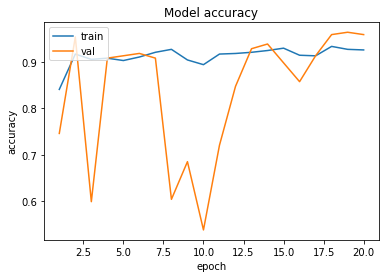

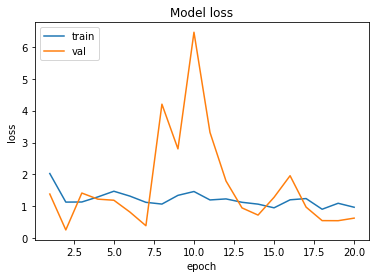

In [432]:
plot_learningcurve(model_his,20)